## Final Project Submission

Please fill out:
* Student name: Janelle Jolliff
* Student pace: part time 
* Scheduled project review date/time: 6.24.19 /5:00PM central
* Instructor name: Victor 
* Blog post URL:


Exploring a set of data providing information on homes sold in Kings County, WA(Seattle and surrounding areas) using the OSEMiN process:

There are a total 21597 entries of homes sold between May 5th, 2014 and May 27th, 2015.

includes 21 features are presented for each home and are described below:


# Column Names and descriptions for Kings County Data Set:


-id:  unique identified for a house

-date:  date house was sold

-price:  prediction target price

-bedrooms:   # of bedrooms

-bathrooms:   # of bathrooms

-sqft_living:   footage of the home

-sqft_lot:    footage of the lot

-floors:  floors (levels) in house

-waterfront: House which has a view to a waterfront

-view: how many times been viewed

-condition: How good the condition is ( Overall )

-grade: overall grade given to the housing unit, based on King County grading system(classification by construction quality which refers to the types of materials used and the quality of workmanship*)

-sqft_above: square footage of house apart from basement

-sqft_basement: square footage of the basement

-yr_built: Built Year

-yr_renovated: Year when house was renovated

-zipcode: zipcode

-lat: Latitude coordinate

-long: Longitude coordinate

-sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors

-sqft_lot: The square footage of the land lots of the nearest 15 neighbors



*according to https://info.kingcounty.gov/

# OBTAIN

importing the libraries to obtain and explore dataset:


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
plt.style.use('seaborn')
%matplotlib notebook

-importing dataset and looking at size

In [2]:
df = pd.read_csv('kc_house_data.csv')
data = df.copy()

data.shape

(21597, 21)

In [3]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,21
Number of observations,21597
Total Missing (%),1.4%
Total size in memory,3.5 MiB
Average record size in memory,168.0 B
Numeric,19
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# SCRUB

checking some basic stats of variables, see if there's anything unusual/unexpected that may be worth looking into:

In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


initial observations:

-there are a couple of columns missing above, which could be due to defaulting to the wrong data type for my intended purposes

-mean bedroom count is 3.37, max is 33. this may pose an outlier issue, or a data entry error

-is there really a home with only a half bathroom?

-doubting the accuracy of views- I would assume mean value would be closer to 1 or higher
_______


looking at column names and data types, an incorrect datatype could affect accurately exploring relationships with price:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


_____________
convert date to datetime, interested in min and max to get an idea of the timeframe:

In [7]:
data['date'] = df['date'].apply(pd.to_datetime)
data.date.min(), data.date.max()

(Timestamp('2014-05-02 00:00:00'), Timestamp('2015-05-27 00:00:00'))

convert sqft_basement to a numerical data type:

In [8]:
#ran into an error indicating there were '?'s present, so I have removed those to allow for conversion:
data= data.loc[data.sqft_basement != '?']
data['sqft_basement'] = data['sqft_basement'].astype(float)

_______________
home with 33 bedrooms:

In [9]:
data.loc[data['bedrooms']==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


that doesn't look right. eliminating this entry shouldn't be too devastating with this size dataset:

In [10]:
#dataset to only include homes with less than 33 bedrooms
data= data[data.bedrooms < 33]

____________
home(s) with only a half bath:

In [11]:
data.loc[data['bathrooms']==0.5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2259,3971701455,2014-10-03,273000.0,2,0.5,1180,7750,1.0,0.0,0.0,...,6,590,590.0,1945,0.0,98155,47.7690,-122.316,1380,8976
10413,7129800036,2015-01-14,109000.0,2,0.5,580,6900,1.0,0.0,0.0,...,5,580,0.0,1941,0.0,98118,47.5135,-122.262,1570,5040
11662,7987400316,2014-08-14,255000.0,1,0.5,880,1642,1.0,0.0,0.0,...,6,500,380.0,1910,0.0,98126,47.5732,-122.372,1410,2992


that's a little weird, but not impossible, considering the other features of those entries

_______________
ID is unique to each home, but some homes may have sold twice within a year, so I'll check for repeated ID numbers and remove the duplicates:

In [12]:
data.duplicated(subset = "id").sum()

173

In [13]:
data.drop_duplicates(subset ="id", keep = False, inplace = True)

_________
checking out which columns are missing data:

In [14]:
data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2293
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3688
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
#looking at general stats of columns with missing data
data['waterfront'].describe(), data['view'].describe(), data['yr_renovated'].describe()

(count    18504.000000
 mean         0.007674
 std          0.087267
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          1.000000
 Name: waterfront, dtype: float64, count    20736.000000
 mean         0.234905
 std          0.766516
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max          4.000000
 Name: view, dtype: float64, count    17109.000000
 mean        83.424572
 std        399.493355
 min          0.000000
 25%          0.000000
 50%          0.000000
 75%          0.000000
 max       2015.000000
 Name: yr_renovated, dtype: float64)

-replacing missing waterfront data with 0- we're going to assume those houses are not waterfront. Since this is a discrete variable that I will be using as a boolean, I'm replacing the missing data with the most common value. Although there are mostly zeros, I'd bet waterfront properties are associated with higher prices.

In [16]:
data['waterfront'] = data.waterfront.fillna(0)

_________________
-eliminating rows with null values in 'view' column (there are only 64, so the impact shouldn't be too severe) 

In [17]:
data.dropna(subset = ['view'], inplace = True)

_____________________
-yr_renovated has a lot of missing values, and it may be worth looking into the size of impact it makes on price later, but for now we'll drop it

a couple of other variables I won't be exploring further, due to the lack of interest or estimated usefulness in this study using the limited skills I have currently:


-ID: any relationship with id wouldn't be meaningful, or even by chance it did, wouldn't be of use to investor

-DATE: although seasonality is something worth looking into, one year of data alone doesn't provide enough to draw conclusions I'd feel confident applying to future predictions

-LAT & LONG: location surely has an impact on price, but using zipcode as categorical data will suffice for that in the linear regression model

In [18]:
#in case I later want to return to this point in the scrubbing process
clean_data = data.copy()

#removing less valuable/unwanted data by column
to_drop = []

to_drop.append('yr_renovated')
to_drop.append('id')
to_drop.append('date')
to_drop.append('lat')
to_drop.append('long')

data.drop(columns =to_drop, inplace = True, axis = 1)

# EXPLORE

In [19]:
#taking a look at which features are highest correlated to price
#this gives me an idea of which columns will likely be important to the regression model
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701187
grade            0.667015
sqft_above       0.604291
sqft_living15    0.584313
bathrooms        0.524323
view             0.396088
sqft_basement    0.322896
bedrooms         0.317414
waterfront       0.261979
floors           0.254217
sqft_lot         0.086488
sqft_lot15       0.082318
yr_built         0.050874
condition        0.031563
zipcode         -0.050203
Name: price, dtype: float64

a correlation heatmap, for a visual of what features correlate with price, and other covariance between features- (it's a little easier to identify without having to read through a bunch of numbers):

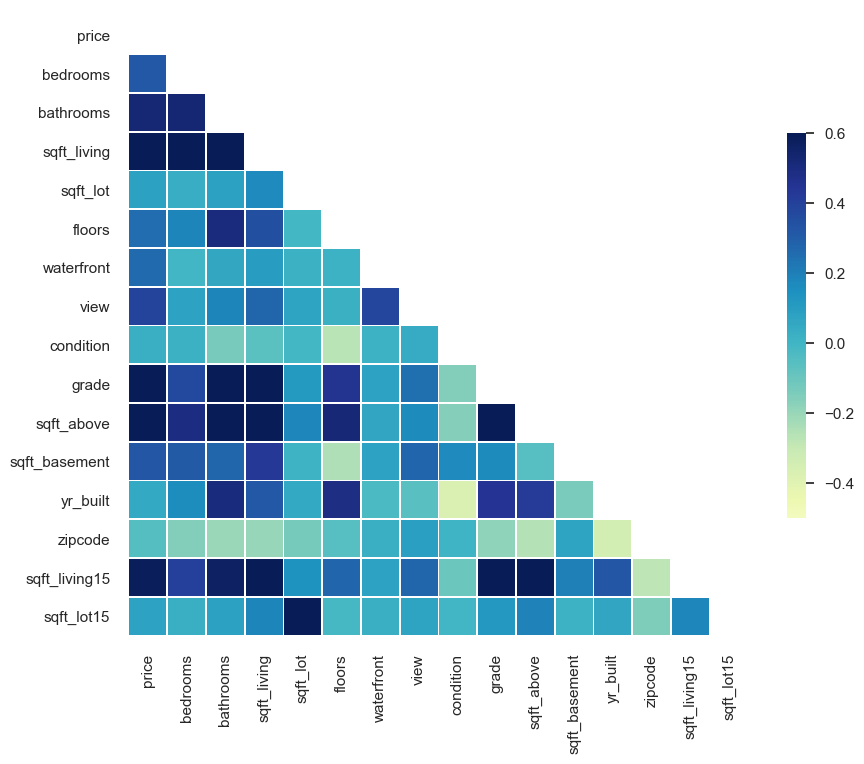

In [20]:
sns.set(style="white")
corr = data.corr()

#a mask the size of covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmin = -.5, vmax=.6, center=0,
            square=True, linewidths=.5,cbar_kws= {"shrink": .5} );

-grade and sqft_above stand out as being highly correlated.
I'm going to drop the sqft_above feature. Since sqft_living had higher correlation with price, and also is describing the size of the home. I'll keep grade, though, as it describes an element unrelated to size. 

-condition is negatively correlated with yr_built and floors, which I wasn't expecting. I'm not sure how to use that information right now

-I had expected a higher correlation with grade and condition, maybe in the future I can see what system is used to assign grades, and what kind of things have positive or negative influence on condition.


there are 6 features descibing square footage of some sort, and unsurprisingly, show strong correlation.



Narrow down these features to sqft_lot and sqft_living. I thought that should suffice in explaining the relationship between square footage/ size in general, and price. 

In [21]:
data.drop(columns = ['sqft_living15','sqft_lot15', 'sqft_above'], axis = 1, inplace=True)

 ____________
 these plots show the distribution of features, as well as possible linear relationships with target variable.
 
 both will help me figure out how to scale data, consider binning, or consider dropping altogether:

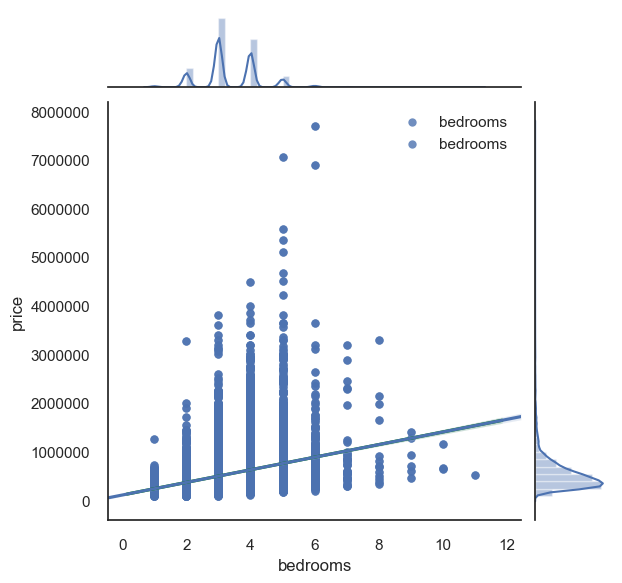

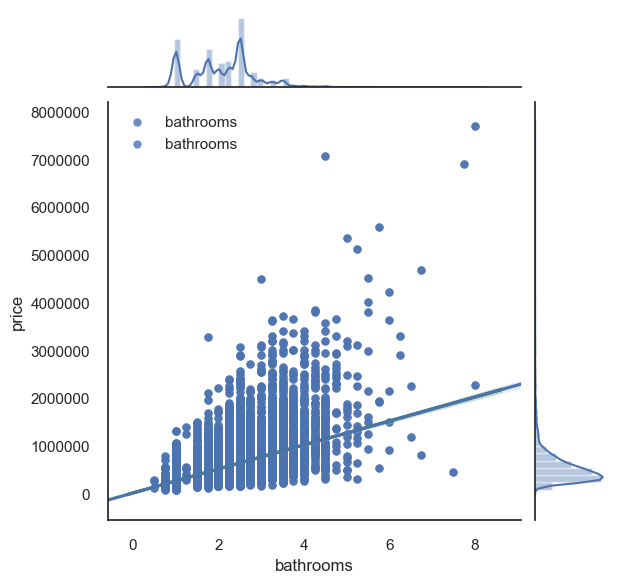

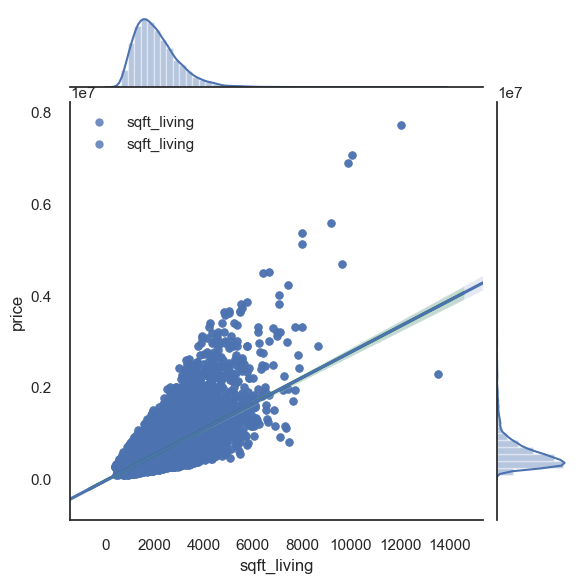

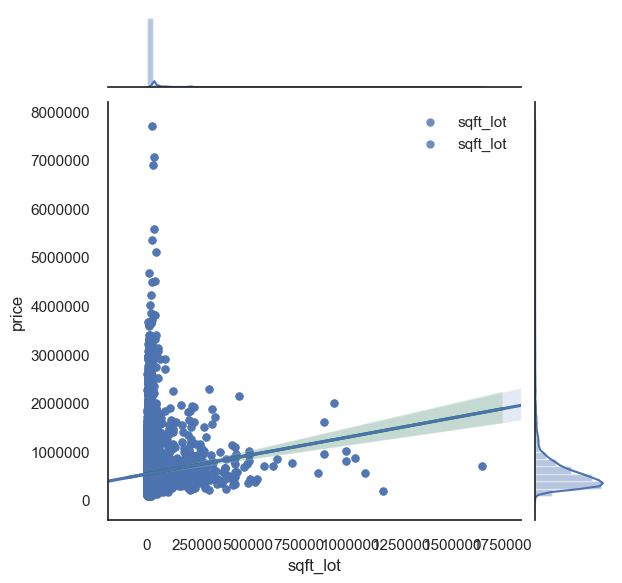

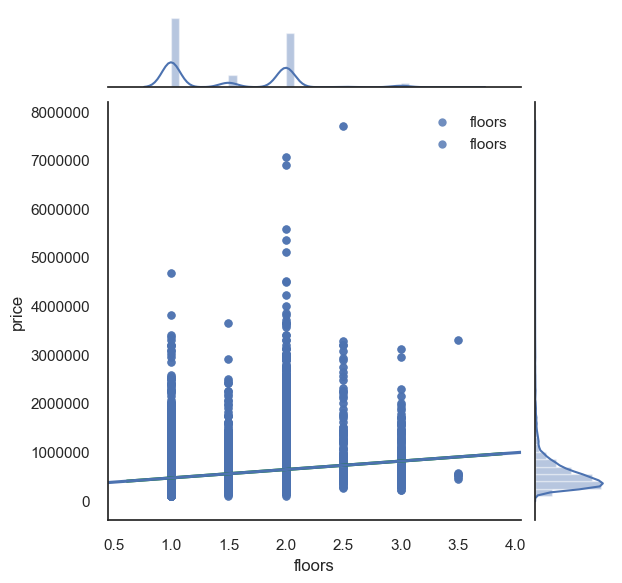

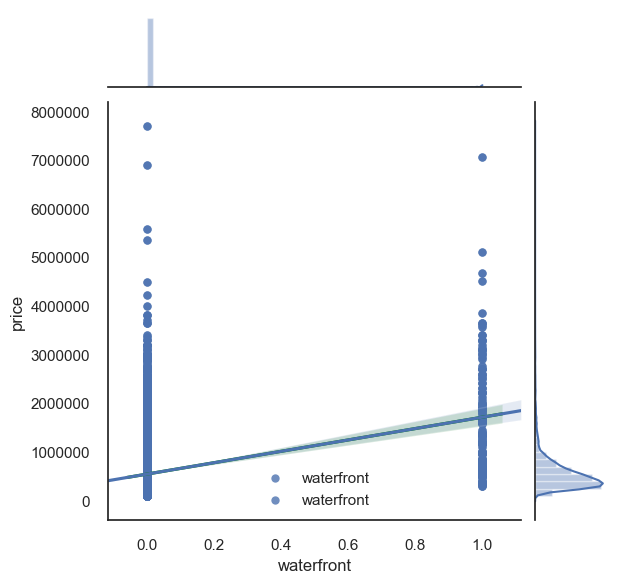

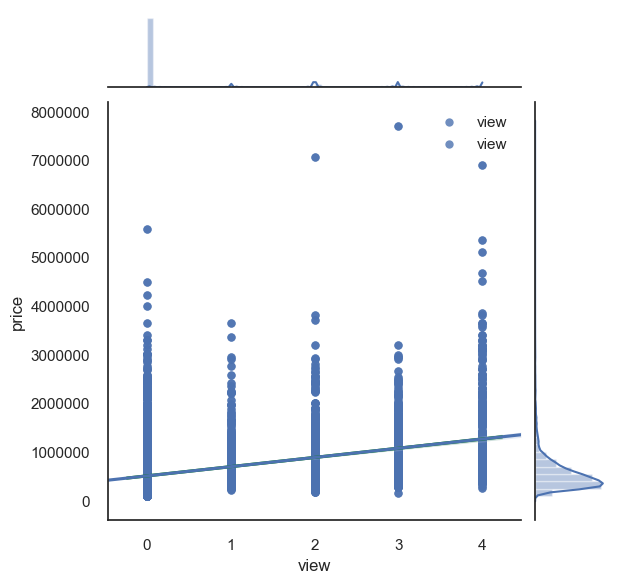

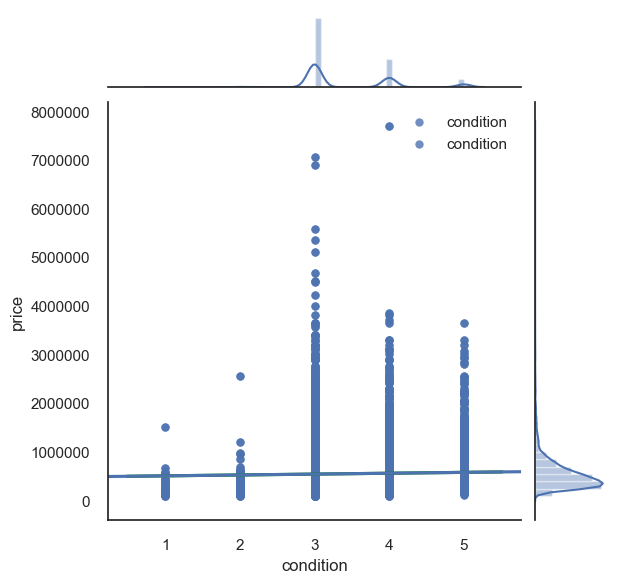

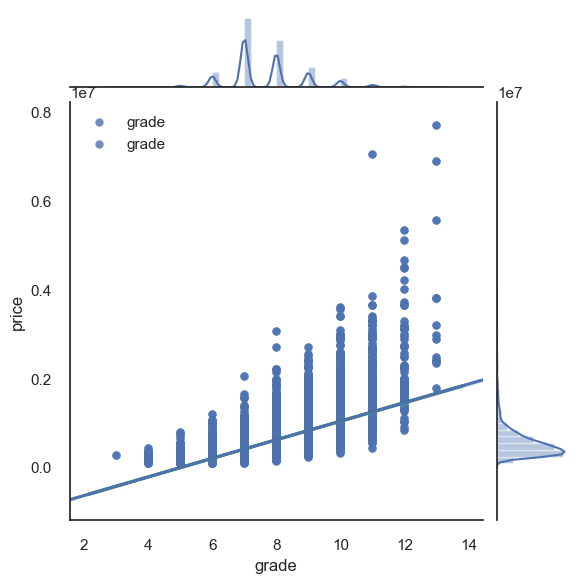

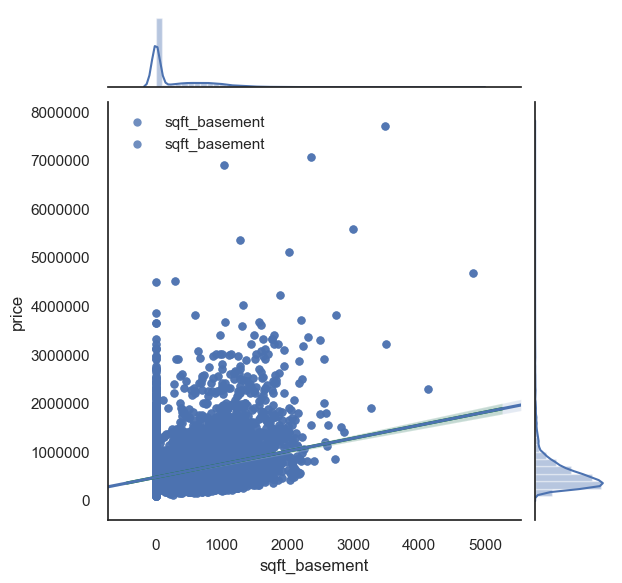

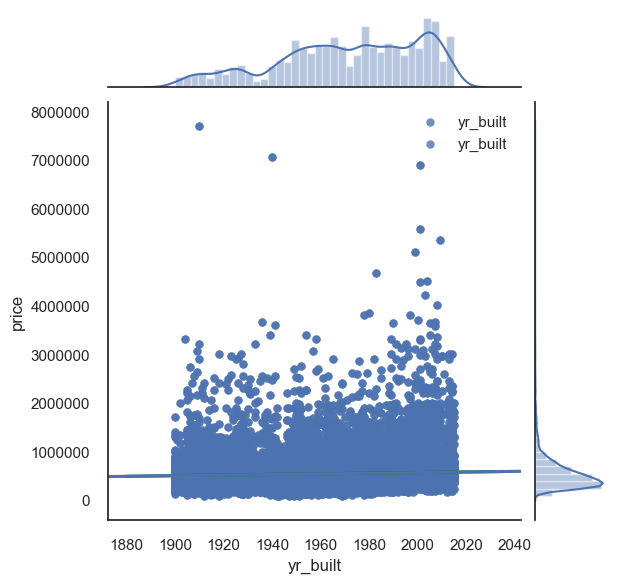

In [22]:
for column in ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built']:
    sns.jointplot(x=column, y="price",
                  data=data, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
    sns.regplot(data[column], data.price, label=column)
    plt.legend()
    plt.show()

________________
looking at distributions with features that have potential to be used as categorical data/ discrete variables. This will help me see if there's potentially a linear relationship with price,and if there's any kind of normal distributions 

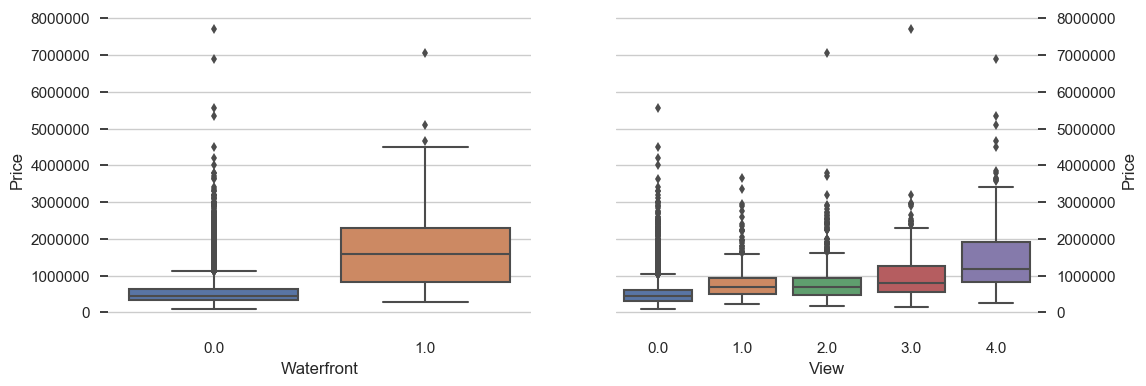

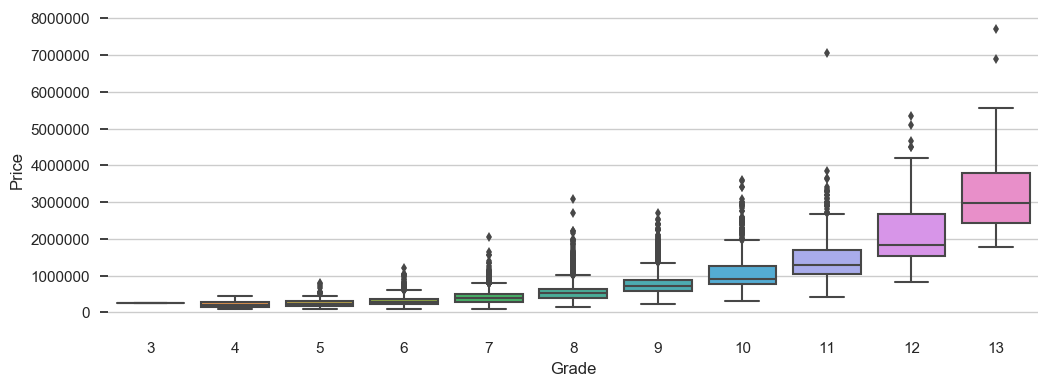

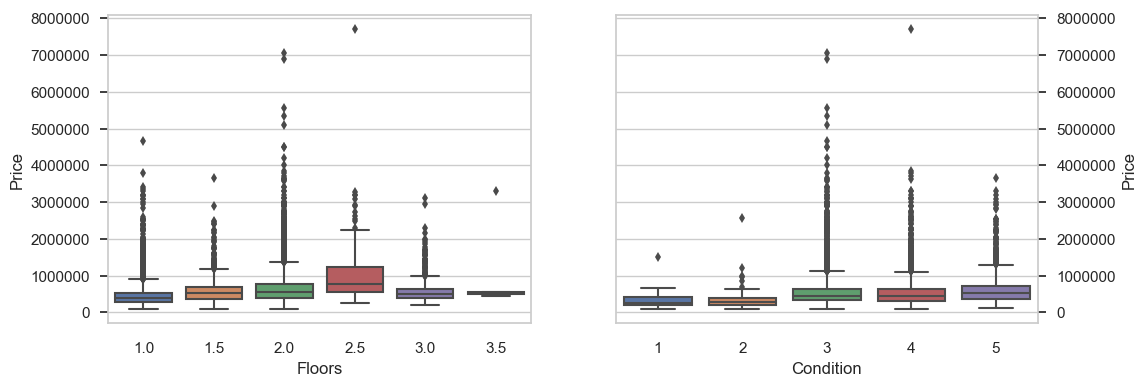

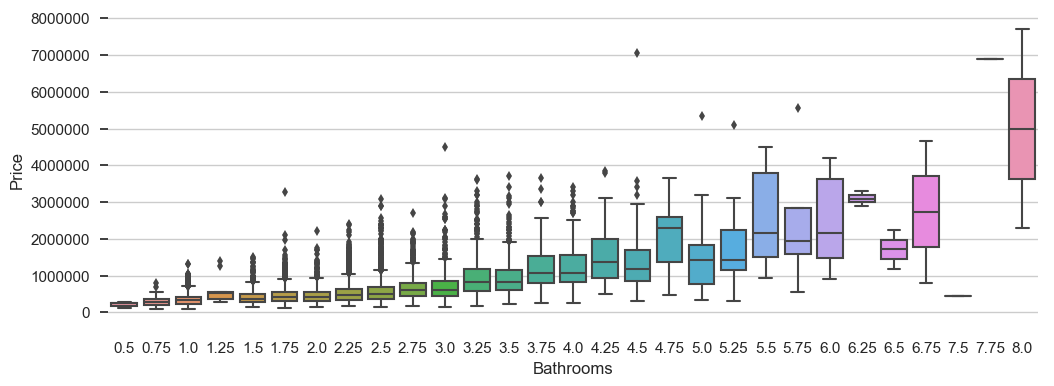

In [23]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(12,4))
sns.boxplot(x=data['waterfront'],y=data['price'], ax=axes[0])
sns.boxplot(x=data['view'],y=data['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='View', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12,4))
sns.boxplot(x=data['grade'],y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Grade', ylabel='Price');

f, axes = plt.subplots(1,2,figsize=(12, 4))
sns.boxplot(x=data['floors'], y = data['price'], ax = axes[0])
sns.boxplot(x=data['condition'], y = data['price'], ax = axes[1])
axes[0].set(xlabel='Floors', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Condition', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12,4))
sns.boxplot(x=data['bathrooms'], y=data['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms', ylabel='Price');


most features appear to have some kind of linear relationship with price, except for 'condition' and 'floors'. 

The price outliers are apparent here, I may want to trim those from data to help support a more reliable model,

# looking at location factor(-not fully developed)

although I won't be using lat and long for the regression model, I'd like to plot them to visualize the dispersion of the highest priced homes, and lowest priced homes, to grasp the significance of location(zip codes) in relation to pricing

(It may not look too attractive now, but I plan on coming back in the future for further development)

In [24]:
#regrouping data by zipcode(using original dataset), averaging features by zipcode
zip_data = df.groupby(['zipcode']).mean()
#resorting price-wise
zip_data = zip_data.sort_values('price', ascending = False)
#resetting index according to new order
zip_data = zip_data.reset_index()
zip_data = zip_data.sort_values('price', ascending = False)
zip_data.head()

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98039,3.755708e+09,2.161300e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.022222,0.440000,3.480000,9.560000,3290.900000,1972.520000,448.400000,47.625840,-122.233540,3132.200000,17291.100000
1,98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003534,0.306962,3.495268,8.687697,2419.842271,1971.470032,213.759542,47.616183,-122.205189,2674.700315,12805.022082
2,98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.044715,0.774194,3.787234,8.960993,2474.329787,1971.471631,240.269710,47.559846,-122.225592,2898.744681,12801.283688
3,98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.149254,3.516729,8.442379,2005.695167,1944.449814,185.809735,47.629619,-122.297866,2280.078067,4898.159851
4,98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,0.153846,3.375000,8.298077,1752.442308,1952.163462,103.428571,47.634591,-122.322250,1954.471154,3303.500000


-the first plot below shows the relative locations of the top priced, and lowest priced homes 

-the plot below that is based on average price of homes sold per zipcode

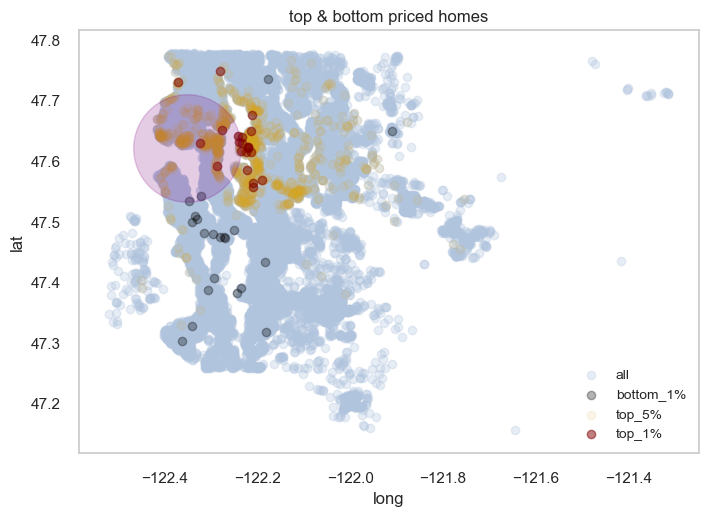

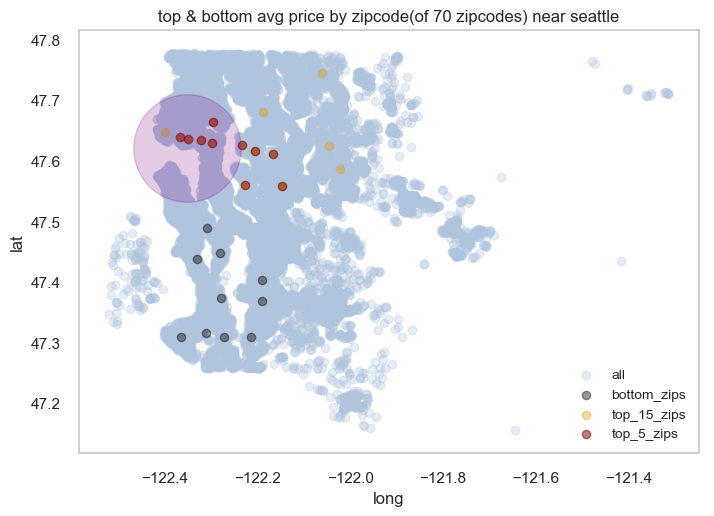

In [25]:
#plotting the top 20,200,and 20000 priced homes
#also plotting the bottom 50 and 200
data2 = df.sort_values('price', ascending = False)

top_1 = data2.head(21)
top_5 = data2.head(1079)
bottom_1 = data2.tail(21)

plt.scatter
plt.scatter(data2.long, data2.lat, color='lightsteelblue',alpha =.3 , label = 'all')
plt.scatter(bottom_1.long, bottom_1.lat, color = 'black', alpha =.3, label = 'bottom_1%')
plt.scatter(top_5.long, top_5.lat, color='goldenrod', alpha = .1, label = 'top_5%')
plt.scatter(top_1.long, top_1.lat,  color='maroon', alpha = .5, label='top_1%')

#seattle center
plt.scatter(-122.3517, 47.6219, s=6000, color = 'purple',alpha = .2)
plt.legend(loc="lower right", scatterpoints=1, fontsize=10)


plt.title("top & bottom priced homes")
plt.xlabel("long")
plt.ylabel("lat")
plt.grid()
plt.show()


#plotting by avg price per zipcode- reaffirming the trend
#(not 100% precise, as I'll be using the mean lat and long from subsets of data within the zipcode)
top_5_zips = zip_data.head(10)
top_15_zips = zip_data.head(15)
bottom_10_zips = zip_data.tail(10)

plt.scatter
plt.scatter(data2.long, data2.lat, color='lightsteelblue',alpha =.3, label ='all')
plt.scatter(bottom_10_zips.long, bottom_10_zips.lat, color='black', alpha = .4, label = 'bottom_zips')
plt.scatter(top_15_zips.long, top_15_zips.lat,  color='goldenrod', alpha = .4, label='top_15_zips')
plt.scatter(top_5_zips.long, top_5_zips.lat, color = 'maroon',alpha=.5, label = 'top_5_zips')

#seattle center
plt.scatter(-122.3517, 47.6219,s=6000, color = 'purple',alpha = .2)

plt.legend(loc="lower right", scatterpoints=1, fontsize=10)

plt.title("top & bottom avg price by zipcode(of 70 zipcodes) near seattle")
plt.xlabel("long")
plt.ylabel("lat")
plt.grid()
plt.show()

the top half of map, (I assume areas closest to Seattle), contain the highest priced homes, and towards the bottom there lies more lower priced homes
_________________


I'd like to explore this a little deeper, but for now I'm just curious to see if there are different correlations bewteen the top priced homes, and the bottom priced ones. Maybe people value different features depending on the area they're looking to buy in.

In [26]:
zip_data.head(7).corr()['price'].sort_values(ascending=False)

price            1.000000
yr_renovated     0.970503
sqft_above       0.968990
bathrooms        0.954034
sqft_living      0.942823
grade            0.918695
sqft_lot15       0.888060
sqft_lot         0.869142
sqft_living15    0.866123
bedrooms         0.750524
yr_built         0.735191
long             0.650831
waterfront       0.352591
view             0.217962
condition       -0.064357
lat             -0.231642
id              -0.330578
floors          -0.457525
zipcode         -0.644492
Name: price, dtype: float64

In [27]:
zip_data[:5]

,zipcode,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,98039,3.755708e+09,2.161300e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.022222,0.440000,3.480000,9.560000,3290.900000,1972.520000,448.400000,47.625840,-122.233540,3132.200000,17291.100000
1,98004,4.394237e+09,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003534,0.306962,3.495268,8.687697,2419.842271,1971.470032,213.759542,47.616183,-122.205189,2674.700315,12805.022082
2,98040,4.199323e+09,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.044715,0.774194,3.787234,8.960993,2474.329787,1971.471631,240.269710,47.559846,-122.225592,2898.744681,12801.283688
3,98112,4.826282e+09,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.149254,3.516729,8.442379,2005.695167,1944.449814,185.809735,47.629619,-122.297866,2280.078067,4898.159851
4,98102,4.102040e+09,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.000000,0.153846,3.375000,8.298077,1752.442308,1952.163462,103.428571,47.634591,-122.322250,1954.471154,3303.500000


In [28]:
zip_data.head(7).corr()['price'].sort_values(ascending=False)

price            1.000000
yr_renovated     0.970503
sqft_above       0.968990
bathrooms        0.954034
sqft_living      0.942823
grade            0.918695
sqft_lot15       0.888060
sqft_lot         0.869142
sqft_living15    0.866123
bedrooms         0.750524
yr_built         0.735191
long             0.650831
waterfront       0.352591
view             0.217962
condition       -0.064357
lat             -0.231642
id              -0.330578
floors          -0.457525
zipcode         -0.644492
Name: price, dtype: float64

In [29]:
zip_data.tail(7).corr()['price'].sort_values(ascending=False)

price            1.000000
grade            0.705886
sqft_living15    0.694653
sqft_living      0.665931
bathrooms        0.650889
view             0.599476
sqft_above       0.595020
id               0.558925
sqft_lot15       0.518026
yr_built         0.517302
bedrooms         0.401706
waterfront       0.367317
sqft_lot         0.320131
floors           0.221187
zipcode          0.193100
lat             -0.035852
long            -0.567934
yr_renovated    -0.570865
condition       -0.591541
Name: price, dtype: float64

# log, scaling and dummies

assigning data columns to simpler names to slightly ease prepping the data for the model
(there are many tools that would require much less codes with preprocessing in the future, for now I'm doing it the long way) :

In [30]:
price = data['price']
bedrooms = data['bedrooms']
bathrooms = data['bathrooms']
sqft_living = data['sqft_living']
sqft_lot = data['sqft_lot']
floors = data['floors']
view = data['view']
condition = data['condition']
grade = data['grade']
sqft_basement = data['sqft_basement']
yr_built = data['yr_built']
zipcode = data['zipcode']

the log function helps with abnormally distributed, or skewed data

In [31]:
price = np.log(data['price'])
sqft_living = np.log(data['sqft_living'])
sqft_lot = np.log(data['sqft_lot'])
bathrooms = np.log(data['bathrooms'])

min-max scaling for continous variables allows for better modeling by forcing values on the same scale of 0-1

In [32]:
data['price'] = (price-min(price))/(max(price)-min(price))
data['bedrooms'] = (bedrooms-min(bedrooms))/(max(bedrooms)- min(bedrooms))
data['bathrooms'] = (bathrooms-min(bathrooms))/(max(bathrooms)-min(bathrooms))
data['sqft_living'] = (sqft_living - min(sqft_living))/(max(sqft_living)-min(sqft_living))
data['grade'] = (grade-min(grade))/(max(grade)-min(grade))
data['sqft_lot']= (sqft_lot-min(sqft_lot))/(max(sqft_lot)-min(sqft_lot))


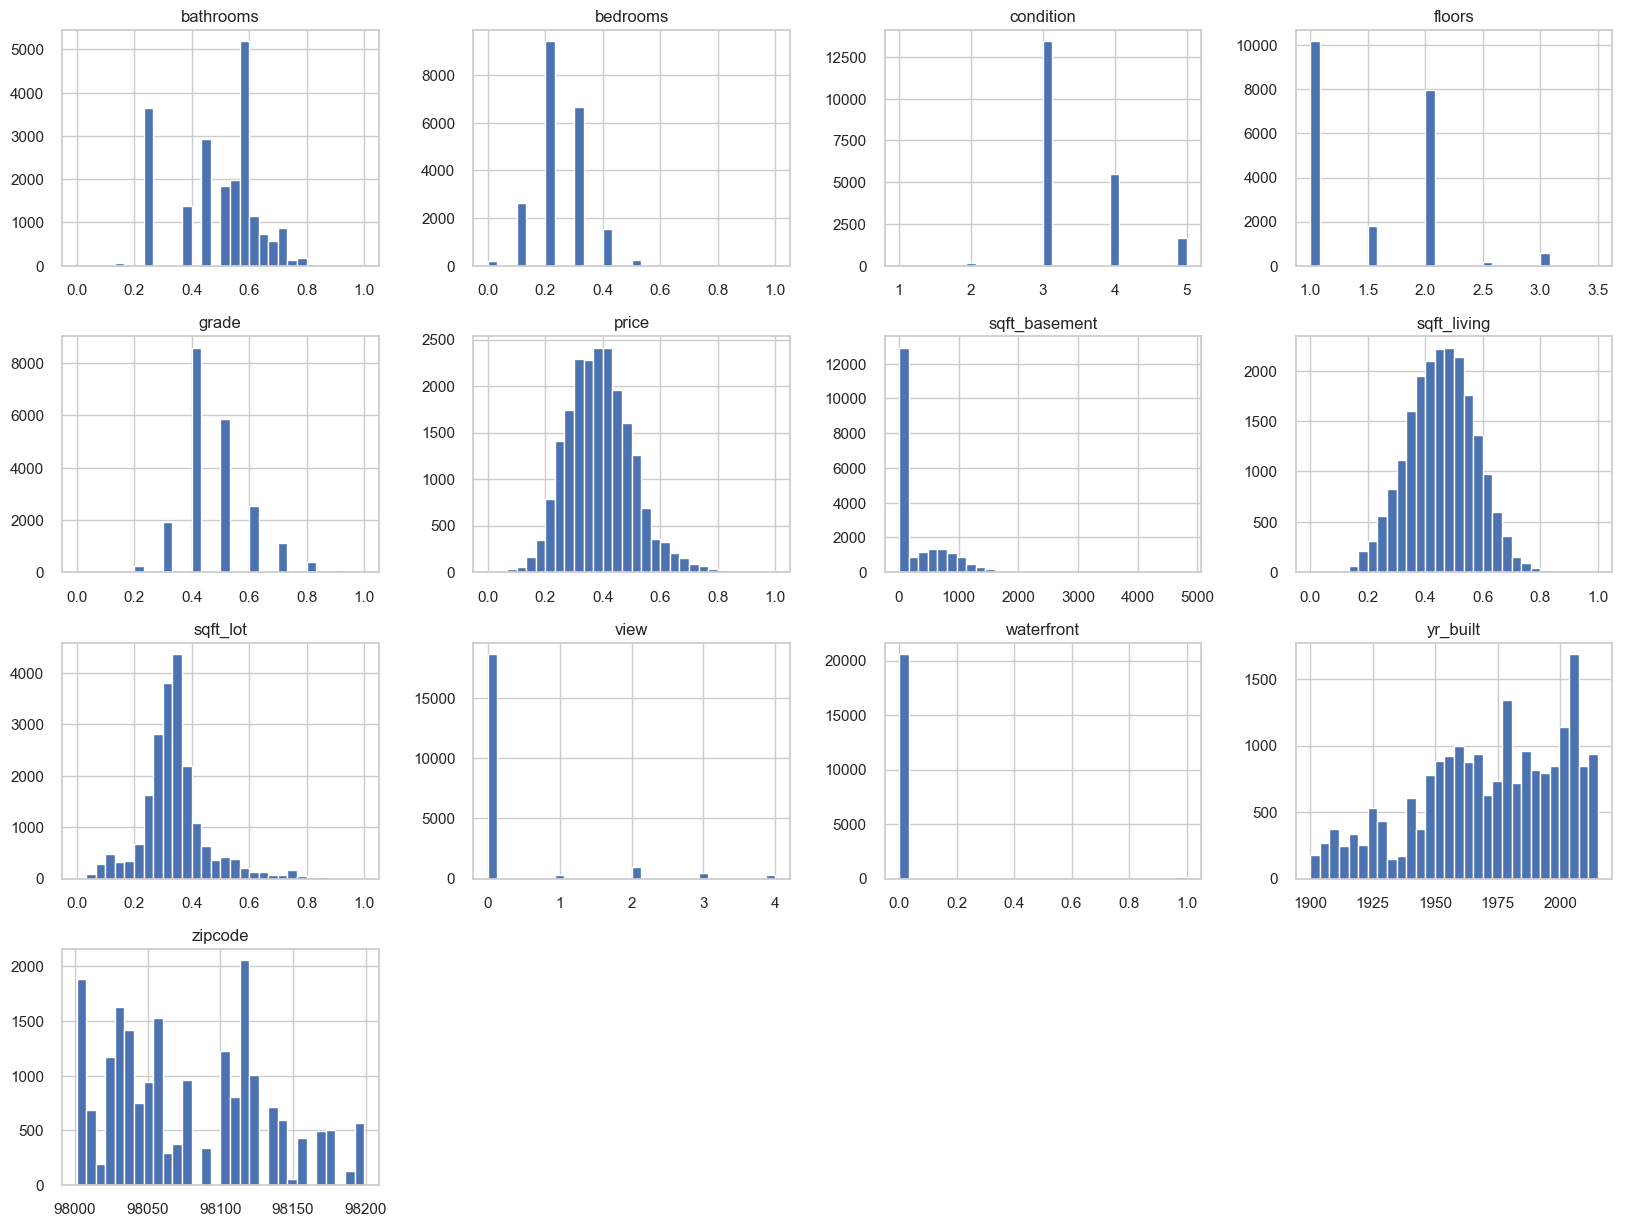

In [33]:
#looking at distribution now that log and normalizing has been done
data.hist(figsize =(20,15), bins= 30);

although the continuous variables are looking a little more normally distributed, I'm concerned about 'view', and 'waterfront' having so many zeros. These will likely be excluded from model. 

___________________

taking a look at highest correlated features to keep in mind for binning, and when feature selecting:

In [34]:
corr_matrix = data.corr()
print(corr_matrix["price"].sort_values(ascending=False))

price            1.000000
grade            0.702559
sqft_living      0.673874
bathrooms        0.518019
bedrooms         0.352369
view             0.345583
sqft_basement    0.316150
floors           0.307223
waterfront       0.170424
sqft_lot         0.139599
yr_built         0.075710
condition        0.033112
zipcode         -0.034577
Name: price, dtype: float64


binning discrete or categorical values:
even ordinal data may not have expected linear relationship with price:

-since yr_built has such a weak correlation as a continuous, I'll see what it looks like divided into bins.

-condition, floors, views, basement will be binned as discrete variables


In [35]:
bins = [0, 1975,1990,2005, 2015]
bins_yr = pd.cut(data['yr_built'], bins)
bins_yr = bins_yr.cat.as_unordered()
yr_dummy = pd.get_dummies(bins_yr, prefix="yr")

#view and sqft_basement will be boolean
data[['view', 'sqft_basement']] = data[['view',  'sqft_basement' ]].astype('bool')
data[['zipcode']] = data[['zipcode']].astype('category') 

water_dummy = pd.get_dummies(data['waterfront'], prefix = 'wat')
view_dummy = pd.get_dummies(data['view'], prefix="vie")
base_dummy = pd.get_dummies(data['sqft_basement'], prefix = 'bas')
zip_dummy = pd.get_dummies(data['zipcode'], prefix = 'zip')
cond_dummy = pd.get_dummies(data['condition'], prefix = 'con')
floors_dummy = pd.get_dummies(data['floors'], prefix = 'flo')

#removing dummied variables
data = data.drop(["view", "floors", "sqft_basement", 'condition','yr_built', 'zipcode', 'waterfront'], axis=1)

data = pd.concat([data, yr_dummy, water_dummy, view_dummy, base_dummy, zip_dummy, cond_dummy, floors_dummy], axis=1)

In [36]:
#getting rid of characters that may interfere with model fitting
data.columns = data.columns.str.replace('(', '', regex=False)
data.columns = data.columns.str.replace(']', '', regex=False)
data.columns = data.columns.str.replace(' ', '', regex=False)
data.columns = data.columns.str.replace(',', '', regex=False)
data.columns = data.columns.str.replace('.', '', regex=False)

#need to find better way to do this- I'll fix it later

# MODEL

Dataset and its features are normalized, scaled, and dummied, it's time to see how it does in an ols model. The model reveals how well the features predict the price. 

## model 1

In [37]:
outcome = 'price'
predictors = data.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [38]:
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1730.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:28:37   Log-Likelihood:                 37733.
No. Observations:               20736   AIC:                        -7.529e+04
Df Residuals:                   20646   BIC:                        -7.457e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0402      0.001     30.487      0.000       0.038       0.043
bedrooms       -0.0363      0.004     -8.626      0.000      -0.045      -0.028
bathrooms       0.0287      0.004      7.956      0.000       0.022       0.036
sqft_living     0.3564      0.006     64.788      0.000       0.346       0.367
sqft_lot        0.1368      0.004     36.110      0.000       0.129       0.144
grade           0.2287      0.004     54.313      0.000       0.220       0.237
yr_01975        0.0068      0.001      9.004      0.000       0.005       0.008
yr_19751990     0.0008      0.001      1.183      0.237      -0.001       0.002
yr_19902005     0.0109      0.001     14.569      0.000       0.009       0.012
yr_20052015     0.0216      0.001     25.067      0.000       0.020       0.023
wat_00         -0.0427      0.002    -26.696      0.000      -0.046      -0.040
wat_10          0.0829      0.002     39.490      0.000       0.079       0.087
vie_False       0.0018      0.001      2.309      0.021       0.000       0.003
vie_True        0.0384      0.001     43.134      0.000       0.037       0.040
bas_False       0.0245      0.001     35.283      0.000       0.023       0.026
bas_True        0.0157      0.001     19.283      0.000       0.014       0.017
zip_98001      -0.1079      0.002    -50.681      0.000      -0.112      -0.104
zip_98002      -0.1092      0.003    -38.661      0.000      -0.115      -0.104
zip_98003      -0.1018      0.002    -42.285      0.000      -0.107      -0.097
zip_98004       0.1456      0.002     64.452      0.000       0.141       0.150
zip_98005       0.0584      0.003     19.163      0.000       0.052       0.064
zip_98006       0.0416      0.002     22.428      0.000       0.038       0.045
zip_98007       0.0407      0.003     12.075      0.000       0.034       0.047
zip_98008       0.0386      0.002     16.297      0.000       0.034       0.043
zip_98010      -0.0583      0.004    -14.508      0.000      -0.066      -0.050
zip_98011      -0.0045      0.003     -1.595      0.111      -0.010       0.001
zip_98014      -0.0467      0.004    -12.854      0.000      -0.054      -0.040
zip_98019      -0.0395      0.003    -13.660      0.000      -0.045      -0.034
zip_98022      -0.1022      0.003    -38.379      0.000      -0.107      -0.097
zip_98023      -0.1088      0.002    -59.166      0.000      -0.112      -0.105
zip_98024      -0.0182      0.005     -4.032      0.000      -0.027      -0.009
zip_98027       0.0062      0.002      3.099      0.002       0.002       0.010
zip_98028      -0.0143      0.002     -6.039      0.000      -0.019      -0.010
zip_98029       0.0286      0.002     12.581      0.000       0.024       0.033
zip_98030      -0.0946      0.003    -37.522      0.000      -0.100      -0.090
zip_98031      -0.0887      0.002    -36.37

The R-squared value tells me the model describes the price at a decent level, but this is to be expected with so many variables. I'll want to narrow down the predictors to the ones that do the best job at explaining the price.

To better my model, I'll want to remove features with higher P-values. Lower values indicate a stronger confidence in the variable being influential on price. 

## using functions for feature selection

To assist me in choosing the best features, I'll be using a function that selects based on variables with the lowest P Values. It will first add those with lowest P values, one at a time, and when a P value is too high and reaches a given threshold, it is removed, until I am left with a better set of predicting data.

____________________
Stepwise selection using function code from https://datascience.stackexchange.com/questions/937/does-scikit-learn-have-forward-selection-stepwise-regression-algorithm :

In [39]:
#defining the function
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [40]:
#applying stepwise selection to data
import statsmodels.api as sm
X = pd.DataFrame(data.drop(['price'], axis = 1))
y = pd.DataFrame(data, columns = ['price'])
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/Janelle/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  bathrooms                      with p-value 0.0
Add  sqft_living                    with p-value 0.0
Drop bathrooms                      with p-value 0.0649362


/Users/Janelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Add  grade                          with p-value 0.0
Add  yr_01975                       with p-value 0.0
Add  zip_98023                      with p-value 1.03189e-219
Add  zip_98004                      with p-value 1.41195e-187
Add  vie_True                       with p-value 5.67378e-151
Add  zip_98001                      with p-value 1.2337e-138
Add  zip_98042                      with p-value 2.3009e-144
Add  zip_98003                      with p-value 4.1152e-152
Add  zip_98092                      with p-value 4.70003e-157
Add  zip_98198                      with p-value 8.49546e-122
Add  zip_98058                      with p-value 4.25633e-121
Add  zip_98168                      with p-value 4.75509e-123
Add  zip_98002                      with p-value 6.60847e-125
Add  zip_98038                      with p-value 9.29523e-131
Add  zip_98030                      with p-value 6.09323e-143
Add  zip_98031                      with p-value 1.86889e-150
Add  zip_98178               

_________________
while I can see the features have been narrowed down a bit, I'm still a little overwhelmed with features, I'll use another method to continue selection

I'll now use Recursive Feature Elimination, which will assess which features are most valuable to the model. The result will be 'n' amount of variables chosen with 1 being the highest rank(most important)

In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 15)
selector = selector.fit(data[result], data["price"])

In [42]:
list(zip(result, selector.ranking_))

[('sqft_living', 1),
 ('grade', 1),
 ('zip_98023', 1),
 ('zip_98004', 1),
 ('vie_True', 3),
 ('zip_98001', 1),
 ('zip_98042', 14),
 ('zip_98003', 1),
 ('zip_98092', 1),
 ('zip_98198', 1),
 ('zip_98058', 18),
 ('zip_98168', 1),
 ('zip_98002', 1),
 ('zip_98038', 19),
 ('zip_98030', 10),
 ('zip_98031', 12),
 ('zip_98178', 11),
 ('zip_98022', 16),
 ('zip_98032', 1),
 ('zip_98055', 17),
 ('zip_98112', 15),
 ('wat_10', 1),
 ('zip_98188', 1),
 ('zip_98146', 36),
 ('zip_98056', 42),
 ('zip_98106', 44),
 ('zip_98166', 37),
 ('zip_98059', 43),
 ('zip_98039', 1),
 ('vie_False', 4),
 ('zip_98105', 22),
 ('zip_98040', 24),
 ('zip_98103', 27),
 ('zip_98119', 21),
 ('zip_98115', 28),
 ('zip_98117', 29),
 ('zip_98033', 32),
 ('zip_98199', 26),
 ('zip_98107', 25),
 ('zip_98109', 20),
 ('zip_98122', 31),
 ('zip_98102', 23),
 ('sqft_lot', 30),
 ('zip_98116', 33),
 ('con_5', 52),
 ('wat_00', 1),
 ('zip_98045', 40),
 ('zip_98148', 13),
 ('zip_98144', 46),
 ('zip_98052', 63),
 ('zip_98006', 60),
 ('zip_9800

a few zipcodes, sqft_living, grade, and waterfront were the chosen features, with a view dummy given a '2' rating. now I'll use those selected for the model:

In [43]:
data = data.drop(['bedrooms','bathrooms','sqft_lot', 'yr_01975', 'yr_19751990', 'yr_19902005', 'yr_20052015' , 'bas_False', 'bas_True', 'con_1', 'con_2', 'con_3', 'con_4', 'con_5', 'flo_10', 'flo_15', 'flo_20', 'flo_25', 'flo_30', 'flo_35'], axis=1)

# more model fitting + validation

In [44]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome = 'price'
predictors = data.drop(['price'], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:34:02   Log-Likelihood:                 36435.
No. Observations:               20736   AIC:                        -7.272e+04
Df Residuals:                   20662   BIC:                        -7.213e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0915      0.001     75.719      0.000       0.089       0.094
sqft_living     0.3853      0.004    100.270      0.000       0.378       0.393
grade           0.2327      0.004     58.846      0.000       0.225       0.240
wat_00         -0.0181      0.001    -12.319      0.000      -0.021      -0.015
wat_10          0.1097      0.002     47.025      0.000       0.105       0.114
vie_False       0.0263      0.001     35.677      0.000       0.025       0.028
vie_True        0.0652      0.001     74.001      0.000       0.063       0.067
zip_98001      -0.1025      0.002    -45.596      0.000      -0.107      -0.098
zip_98002      -0.1049      0.003    -35.049      0.000      -0.111      -0.099
zip_98003      -0.1009      0.003    -39.494      0.000      -0.106      -0.096
zip_98004       0.1485      0.002     62.252      0.000       0.144       0.153
zip_98005       0.0664      0.003     20.617      0.000       0.060       0.073
zip_98006       0.0440      0.002     22.540      0.000       0.040       0.048
zip_98007       0.0409      0.004     11.472      0.000       0.034       0.048
zip_98008       0.0388      0.002     15.548      0.000       0.034       0.044
zip_98010      -0.0352      0.004     -8.332      0.000      -0.043      -0.027
zip_98011      -0.0057      0.003     -1.872      0.061      -0.012       0.000
zip_98014      -0.0215      0.004     -5.679      0.000      -0.029      -0.014
zip_98019      -0.0286      0.003     -9.449      0.000      -0.035      -0.023
zip_98022      -0.0787      0.003    -28.448      0.000      -0.084      -0.073
zip_98023      -0.1108      0.002    -57.352      0.000      -0.115      -0.107
zip_98024       0.0111      0.005      2.336      0.020       0.002       0.020
zip_98027       0.0123      0.002      5.800      0.000       0.008       0.016
zip_98028      -0.0137      0.003     -5.438      0.000      -0.019      -0.009
zip_98029       0.0233      0.002      9.738      0.000       0.019       0.028
zip_98030      -0.0930      0.003    -34.901      0.000      -0.098      -0.088
zip_98031      -0.0863      0.003    -33.500      0.000      -0.091      -0.081
zip_98032      -0.1077      0.004    -28.233      0.000      -0.115      -0.100
zip_98033       0.0697      0.002     34.236      0.000       0.066       0.074
zip_98034       0.0133      0.002      7.292      0.000       0.010       0.017
zip_98038      -0.0643      0.002    -36.242      0.000      -0.068      -0.061
zip_98039       0.1941      0.006     32.071      0.000       0.182       0.206
zip_98040       0.0978      0.003     38.424      0.000       0.093       0.103
zip_98042      -0.0846      0.002    -46.694      0.000      -0.088      -0.081
zip_98045      -0.0273      0.003     -9.556      0.000      -0.033      -0.022
zip_98052       0.0359      0.002     20.01

the R squared value, and the P-values(except for some of the zip dummies), all indicate I've found a decent fitting model. 

*higher P-value zip dummies: 98024, 98072, 98077, 98118

I'll use a QQ plot to visualize normality, which I don't expect to look on point, seeing the skew is 0.175 and the kurtosis is 5.525

In [45]:
outcome = 'price'
predictors = data.drop(['price' ], axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     1829.
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:34:02   Log-Likelihood:                 36435.
No. Observations:               20736   AIC:                        -7.272e+04
Df Residuals:                   20662   BIC:                        -7.213e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0915      0.001     75.719      0.000       0.089       0.094
sqft_living     0.3853      0.004    100.270      0.000       0.378       0.393
grade           0.2327      0.004     58.846      0.000       0.225       0.240
wat_00         -0.0181      0.001    -12.319      0.000      -0.021      -0.015
wat_10          0.1097      0.002     47.025      0.000       0.105       0.114
vie_False       0.0263      0.001     35.677      0.000       0.025       0.028
vie_True        0.0652      0.001     74.001      0.000       0.063       0.067
zip_98001      -0.1025      0.002    -45.596      0.000      -0.107      -0.098
zip_98002      -0.1049      0.003    -35.049      0.000      -0.111      -0.099
zip_98003      -0.1009      0.003    -39.494      0.000      -0.106      -0.096
zip_98004       0.1485      0.002     62.252      0.000       0.144       0.153
zip_98005       0.0664      0.003     20.617      0.000       0.060       0.073
zip_98006       0.0440      0.002     22.540      0.000       0.040       0.048
zip_98007       0.0409      0.004     11.472      0.000       0.034       0.048
zip_98008       0.0388      0.002     15.548      0.000       0.034       0.044
zip_98010      -0.0352      0.004     -8.332      0.000      -0.043      -0.027
zip_98011      -0.0057      0.003     -1.872      0.061      -0.012       0.000
zip_98014      -0.0215      0.004     -5.679      0.000      -0.029      -0.014
zip_98019      -0.0286      0.003     -9.449      0.000      -0.035      -0.023
zip_98022      -0.0787      0.003    -28.448      0.000      -0.084      -0.073
zip_98023      -0.1108      0.002    -57.352      0.000      -0.115      -0.107
zip_98024       0.0111      0.005      2.336      0.020       0.002       0.020
zip_98027       0.0123      0.002      5.800      0.000       0.008       0.016
zip_98028      -0.0137      0.003     -5.438      0.000      -0.019      -0.009
zip_98029       0.0233      0.002      9.738      0.000       0.019       0.028
zip_98030      -0.0930      0.003    -34.901      0.000      -0.098      -0.088
zip_98031      -0.0863      0.003    -33.500      0.000      -0.091      -0.081
zip_98032      -0.1077      0.004    -28.233      0.000      -0.115      -0.100
zip_98033       0.0697      0.002     34.236      0.000       0.066       0.074
zip_98034       0.0133      0.002      7.292      0.000       0.010       0.017
zip_98038      -0.0643      0.002    -36.242      0.000      -0.068      -0.061
zip_98039       0.1941      0.006     32.071      0.000       0.182       0.206
zip_98040       0.0978      0.003     38.424      0.000       0.093       0.103
zip_98042      -0.0846      0.002    -46.694      0.000      -0.088      -0.081
zip_98045      -0.0273      0.003     -9.556      0.000      -0.033      -0.022
zip_98052       0.0359      0.002     20.01

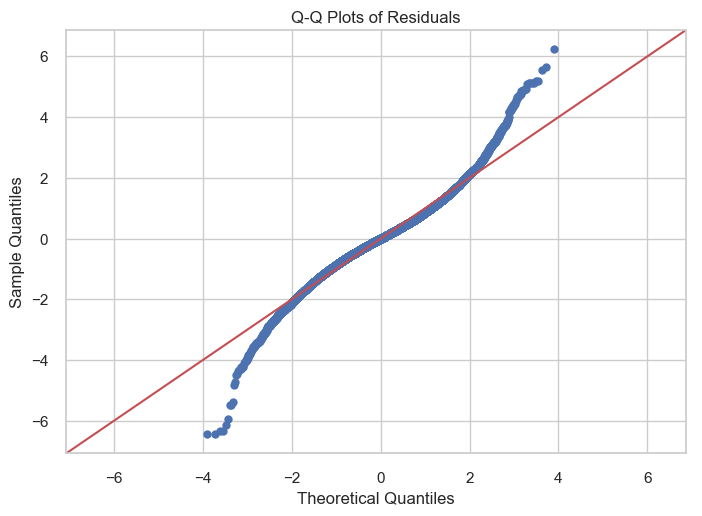

In [46]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
plt.title('Q-Q Plots of Residuals');

the tails are distrupting the normality, I may need to refine the model.

There may be some outliers, I'll look at a scatter plot to check for homoscedasticity:

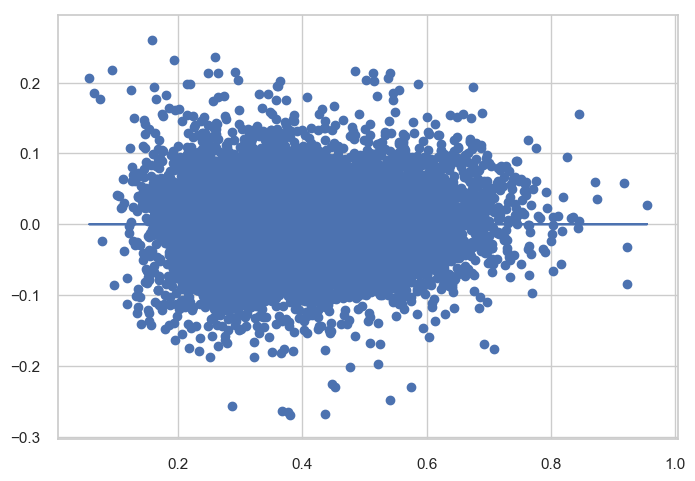

In [47]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(predictors))])

there do appear to be some outliers, there's some room for improvement

Using train test split to evaluate reliability of model:
    (also called hold-out validation)
    
This will check to see if our model is possibly underfitting or overfitting

In [48]:
#Test-train-split separates a fraction of original data and uses the larger portion to 'teach',
#then, uses the held-out predictors to 'test' how close the estimated outcome is to the actual data target variable
X = predictors
y = data.price
type(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #using 75% data for training
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0017440860283591472
Test Mean Squarred Error: 0.0017509612087832265


the mean squared error is very similar, but the training set is slightly lower than the test set, it's more on the overfitting side.

_______________

Now I'd like to take a look at the model without the zipcode, and reintroducing some of the others back:

In [49]:
lat = (clean_data['lat'] - min(clean_data['lat']))/max(clean_data['lat']-min(clean_data['lat']))

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = "price ~  sqft_living + grade + view_dummy+ lat "
model = ols(formula= formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                 1.336e+04
Date:                Fri, 28 Jun 2019   Prob (F-statistic):               0.00
Time:                        19:34:04   Log-Likelihood:                 28809.
No. Observations:               20736   AIC:                        -5.761e+04
Df Residuals:                   20731   BIC:                        -5.757e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0248      0.002    -15.862      0.000      -0.028      -0.022
sqft_living       0.3468      0.005     64.847      0.000       0.336       0.357
grade             0.3465      0.005     64.142      0.000       0.336       0.357
view_dummy[0]    -0.0428      0.001    -53.355      0.000      -0.044      -0.041
view_dummy[1]     0.0179      0.001     14.016      0.000       0.015       0.020
lat               0.2018      0.002    106.498      0.000       0.198       0.206
==============================================================================
Omnibus:                      609.392   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              830.213
Skew:                           0.330   Prob(JB):                    5.27e-181
Kurtosis:                       3.726   Cond. No.                     2.80e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.16e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

although the R-squared value has dropped dramatically, the skew and kurtosis are at a more ideal value, and p-values at 0

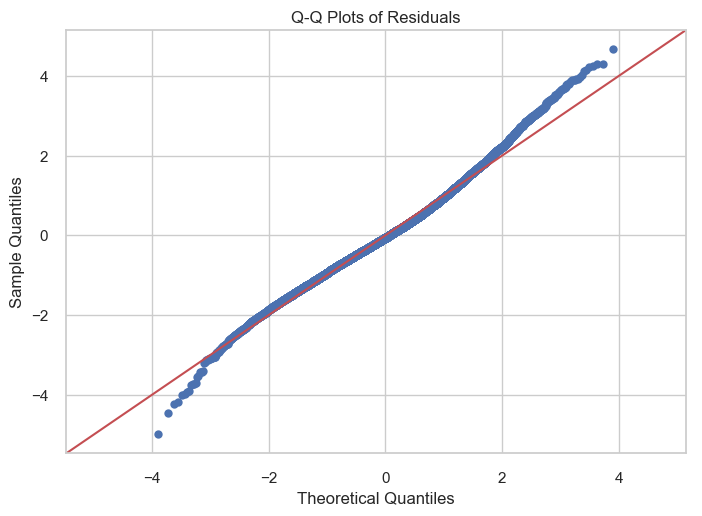

In [51]:
import statsmodels.api as sm
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist = stats.norm, line = '45', fit = True)
plt.title('Q-Q Plots of Residuals');

the above qq plot looks better than the one above, but the R squared indicates there's less confidence in the features providing enough information to predict the price as accurately

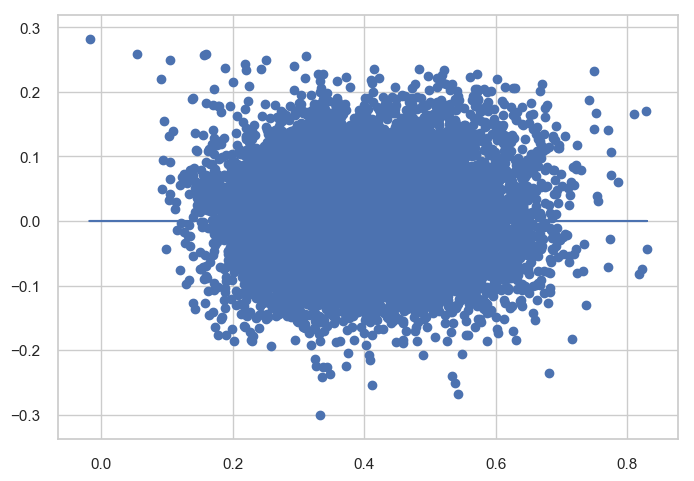

In [52]:
plt.scatter(model.predict(predictors), model.resid)
plt.plot(model.predict(predictors), [0 for i in range(len(data))]);

The homoscedasticity isn't the best,and I think dropping the zipcodes is leaving out important information. I will revert back to the previous model above

train-test-split again:

In [53]:
X = predictors
y = data.price
type(X)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) #using 75% data for training
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.0017367327336573037
Test Mean Squarred Error: 0.0017704007185340017


the MSE is close to zero, but maybe too close

In [54]:
#more practice testing MSE- want it to be consistently close to 0
#validating the model using mean squared error for random train test splits
linreg = LinearRegression()
X = predictors
y = data.price

cv_results = cross_val_score(linreg, X, y, cv = 10, scoring = 'neg_mean_squared_error')
cv_results

array([-0.00178688, -0.00192386, -0.00180741, -0.00185344, -0.00169473,
       -0.00176708, -0.00176495, -0.00174301, -0.00180552, -0.00154963])

In [55]:
np.mean(cv_results)

-0.0017696515478603566

I could use vif to test for multicollinearity, but also,  Ridge modeling is supposed to provide a more accurate R-squared value, despite the covariance.

In [56]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
ridge_model = clf.fit(X_train, y_train) 
print(f'Ridge R-Squared: {ridge_model.score(X_train, y_train)}')

Ridge R-Squared: 0.8666287617879529


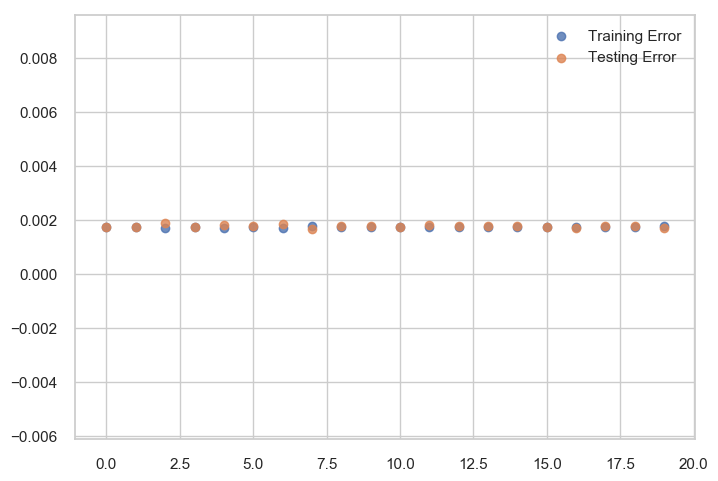

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
import matplotlib.pyplot as plt

num = 20
train_err = []
test_err = []
for i in range(num):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(list(range(num)), train_err, label='Training Error', alpha = 0.8)
plt.scatter(list(range(num)), test_err, label='Testing Error', alpha = 0.8)
plt.legend();

cross validation w/ K-fold avg MSE

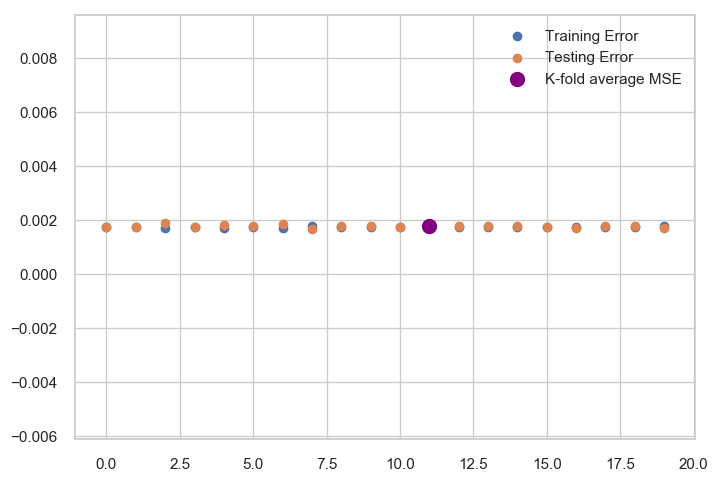

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring="neg_mean_squared_error"))

k_fold_result = abs(cross_val_results)

plt.scatter(list(range(num)), train_err, label='Training Error')
plt.scatter(list(range(num)), test_err, label='Testing Error')
plt.scatter(11,k_fold_result,color='purple', label = 'K-fold average MSE',s=100)
plt.legend();

# iNTERPRET

SQFT_living:

    Unsurprisingly, the square footage of the home had the greatest influence on price. Sqft_lot and other square footage features were correlated with sqft_living, but didn't show to be as significant in the model. Bedrooms and bathrooms also increased price at lower, but similar rate.

    It might be interesting to look at features that predict price per square foot. The dataset includes homes valued at 144 to 569 dollars per square foot.

    coefficient: 0.3864
    price increases by .3846% per 1% of squarefootage increase.

__________________

LOCATION:

    zipcode accounts for 20% or so of predicting pricing. With more time, I'd create subsets based on location, perhaps, and reevaluate the strongest predictors. I would be curious as to what factors influence price aside from location and size. 


    highest coefficient: 98039: 0.1941
    lowest:            98023: -0.1108
    difference :.30
___________________

GRADE: 

    Kings County grade is determined by quality of materials and craftmanship. Further investigation on the system used to grade homes may reveal more useful information. Although grade was one of the major factors in predicting the price, I'm unsure as to how one could improve grade of a home. 

    coefficient: 0.2348
    for each increase in grade, price of home would be expected to rise by 23%
____________________

VIEW FEATURE:

    When coming to the end of my study, I've heard that the 'view' feature is actually referring to the obstruction of view of waterfront, not the amount of times it's been viewed. It wouldn't surprise me that having the view of the water would likely be similarly appealing as a waterfront property(especially in Washington, where people don't frequent the 'beaches' there as often). I'd be interested to see if there are non-waterfront properties with a higher view score than other waterfront properties, and if that impacts price more than actually having that waterfront location.

___________

CONDITION:

    Doesn't seem to impact price significantly, but very few homes fell into the 1-2 category. And some of the highest priced homes are a '3' condition. The scoring guide used to determine this score wasn't provided.

_______________


HAVING TOO LITTLE DATA:

DATE: 

    The dataset only covers about a year of home sales. It woud likely take decades of data, and expanding beyond the limited features of this dataset, to get an idea of how to predict future home pricing.


DUPLICATE IDs:

    Initially when scrubbing the dataset, the only interest I had in the ID column was checking for, and eliminating repeat houses. Afterwards I didn't see any use for it.
    However, I later did some exploring of the duplicate IDs in the original dataset and found that, although the square footage, bathrooms, and location all remained the same, the first buyers were able to sell the home a second time within a year at an inflated price. Although this made up an extremely small percentage of the full dataset, I would expect at least one of the homes would have added to the those figures somehow.


YEAR RENOVATED:

    I did explore this feature briefly, and homes renovated, especially after 1999, sold for much higher prices than even the newly built homes- (avg of 25% more). Of these newly renovated homes, the build yr ranges from the 1940s to 2003.
    
There are many other features I would have liked to have access to, regarding the homes that were sold. I noticed, when looking at the homes that had been resold within the year, that there hadn't been changes in square footage, bedrooms, or bathrooms. As I develop more skills, I hope to return to improve my analysis and model(s).

Things I wish I'd done better:

    Clearly my notebook could use a lot of work. There's a lot of things I wish I could have made into functions or used loops, and just be more pythonically correct in general. This will come with experience, I'm sure, and learning new tools to help do more with less lines of code. Just to be more efficient, but also thourough. 
    
    Another thing- I think I was too quick to drop data, or not explore it more. And also, I've deleted nearly half the cells I had, thinking the notebook was too lengthy and didn't "flow". Although it did help with shortening it, it also excluded parts that may have been helpful to others trying to make sense of it. I need to learn a balance to make sure I don't have anything unhelpful, but also keep the things that would make it easier for others to interpret. With the data, I should have either kept it and explored it before dropping, or at least for the ones I did drop, show the steps that led me to that decision, and other decisions. I think next time I'll keep as much data preserved as possible, and could be surprised at different relationships between features that could reveal something not obvious.  I'll also make sure I put more thought into what I keep and exclude as part of the notebook, and make sure every step is explained adequately. '
    
    
    My presentation could definitely use some work, too. I need to learn how to communicate things confidently and smoothly. Also another balance thing here, is making sure I include the right amount of information to get my main points across, but not overdo it and make the listeners feel like they need to make notes or read more than a simple line or two. I need to imagine what the audience would like to see to gain understanding of the material, and keep the focus on results that explain things that matter to them. 
    